In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

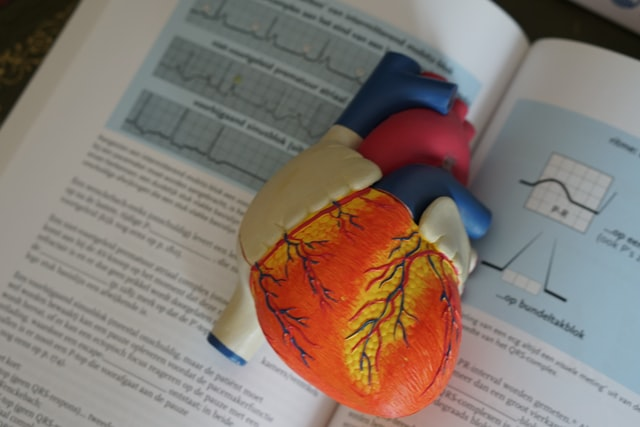

>According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Import libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


from sklearn import svm

# import Dataconfusion_matrix

In [ ]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv',index_col='id')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

## see heatmap of missing values

In [ ]:
sns.heatmap(data.isnull())

##### As bmi has less number of missing values we will not drop the column, rather we will fill the missing values with its mean values

In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

#### again check for missing values

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull())

##### all the missing values has been handled

# Exploratotry Data Analysis

### See the relationship between age and stroke

In [ ]:
sns.catplot('stroke','age',data=data,kind='violin')
plt.title('relationship between age and stroke')

Here, we can see normally people who are aged above 40 years age normally have more number of stroke 

In [ ]:
data[['Residence_type','bmi']].groupby('Residence_type').mean('bmi').plot(kind='bar')

In [ ]:
data[['work_type','avg_glucose_level']].groupby('work_type').mean('avg_glucose_level').plot(kind='bar')
plt.ylabel('average glucose level')
plt.title('relationship between glucose level and work type')

### checking bmi and avg glucose level with respect to stroke

In [ ]:
data[['stroke','avg_glucose_level','bmi']].groupby('stroke').mean(['bmi','avg_glucose_level']).plot(kind='bar')

#### here we can see average glucose level plays a significant role for storke. bmi stays about the same for both categories. we can drop the bmi column as it does not plays a huge role for predicting stroke

In [ ]:
data.drop('bmi',axis=1, inplace=True)

In [ ]:
data.columns

# Explore categorical features

### gender column

In [ ]:
data['gender'].value_counts()

There is an other gender on the data. We can replace it with female gender

In [ ]:
data[data['gender'] == 'Other']

In [ ]:
data['gender'].replace('Other','Female',inplace=True)

In [ ]:
data['gender'].value_counts()

## Ever married column

In [ ]:
data['ever_married'].value_counts()

## Work Type column

In [ ]:
data['work_type'].value_counts()

## Somking Status Column

In [ ]:
data['smoking_status'].value_counts()

In [ ]:
data['smoking_status'].value_counts(normalize=True)

Here, smoking status as Unknown have taken a large percentage of total column. So, we can drop the smoking_status column

In [ ]:
data.drop('smoking_status',axis=1,inplace=True)

In [ ]:
data.columns

In [ ]:
data['hypertension'].value_counts()

# Handle the categorical variables

In [ ]:
data.dtypes

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head()

In [ ]:
data.shape

# Determine training and Testing data

In [ ]:
X = data.drop('stroke',axis=1)
Y = data['stroke']

In [ ]:
X

In [ ]:
Y

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# Support Vector Machine

In [ ]:
svm = svm.SVC(gamma='auto',C=10,kernel='linear')
svm = svm.fit(X_train,y_train)
ac_svm = accuracy_score(y_test,svm.predict(X_test))
print('Accuracy is: ',round(ac_svm*100), ' %')
cm_svm = confusion_matrix(y_test,svm.predict(X_test))
sns.heatmap(cm_svm,annot=True,fmt="d")

# Random Forest Classier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

In [ ]:
RFC_Score = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",round(RFC_Score*100), '%')

In [ ]:
rfc_conf = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(rfc_conf,annot=True,fmt="d")

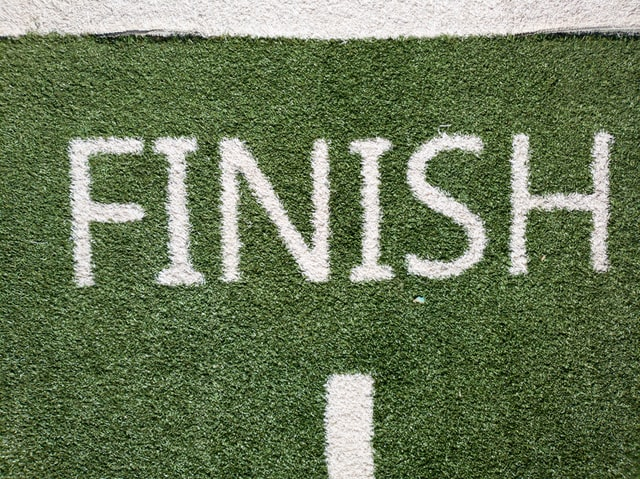